# First of all, we should know our dataset's columns and rows:

Dataset Information:

-Age : Age of the patient

-Sex : Sex of the patient

-exang: exercise induced angina (1 = yes; 0 = no)

-ca: number of major vessels (0-3)

-cp : Chest Pain type chest pain type


    Value 1: typical angina

    Value 2: atypical angina

    Value 3: non-anginal pain

    Value 4: asymptomatic

-trtbps : resting blood pressure (in mm Hg)

-chol : cholestoral in mg/dl fetched via BMI se

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

output : 0 = less chance of heart attack: 1 = more chance of heart attack

# Now lets do some code & visualize some plot:

In [5]:
#import our libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#just for avoiding warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#lets open our dataset and dig into it:

heart = pd.read_csv('heart.csv')

heart.head(70)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1


In [9]:
heart.shape

(303, 14)

so we have a 303*14 table

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#To get some statistical values and informations:

heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#To see number of unique values of each feature:

heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [18]:
#To find duplicated entries and drop them from dataset:

heart.drop_duplicates(inplace=True)

Now that we can see our dataset clearly, it is ready to use in visualisation:

<AxesSubplot:xlabel='age', ylabel='count'>

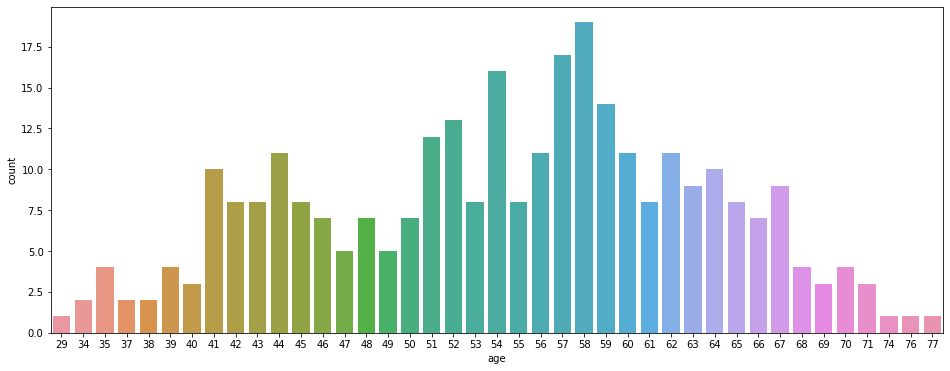

In [19]:
#Lets see the spectrum of ages of patients in dataset:

plt.figure(figsize=(16,6))
sns.countplot(x='age',data=heart)

So ages are more between 40 to 65

<AxesSubplot:xlabel='age', ylabel='count'>

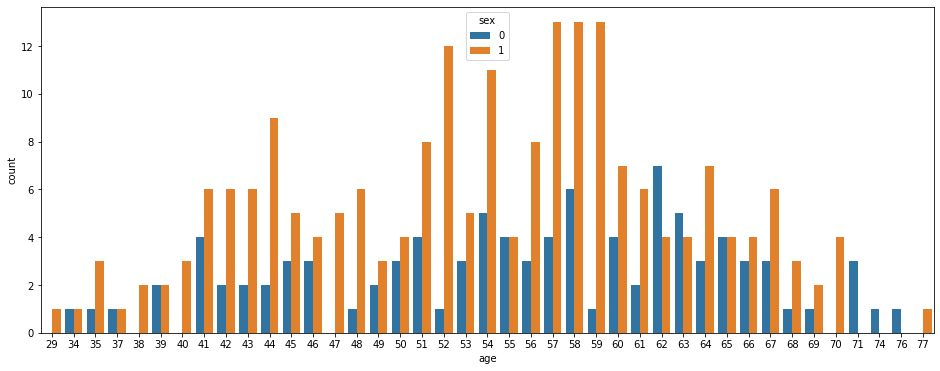

In [20]:
#To see above plot hued by Sex:

plt.figure(figsize=(16,6))
sns.countplot(x='age',data=heart, hue='sex')

So we may say that our statistical community in not uniform neither for 'age' nor for 'sex'

In [29]:
#We could fix this problem with Groupby method, we should groupby it for 'age'

age = heart[['age','output']].groupby('age').sum()

<AxesSubplot:title={'center':'Age vs chances of Heart Attack'}, xlabel='age'>

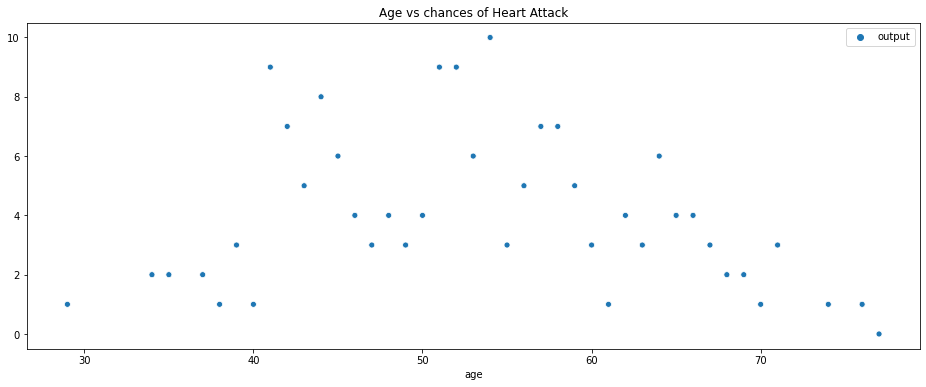

In [42]:
#Now plotting:

plt.figure(figsize=(16,6))
plt.title("Age vs chances of Heart Attack")
sns.scatterplot(data=age)

So we may say that people from age 40 to 55 are more prone to heart attack


Now lets find out the relation between heart attack probability with Blood pressure Cholestrol level:

<AxesSubplot:xlabel='trtbps', ylabel='density'>

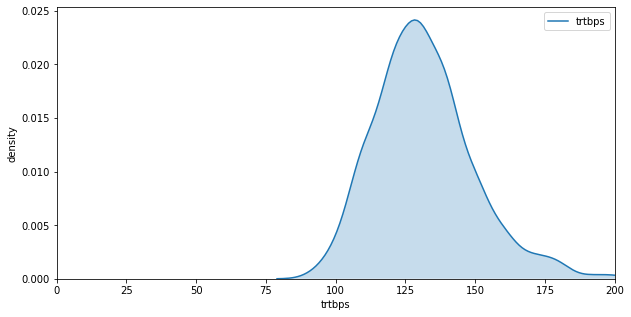

In [53]:
plt.figure(figsize=(10,5))
plt.xlim(0,200)
plt.xlabel('trtbps')
plt.ylabel('density')
sns.kdeplot(heart['trtbps'] ,shade=True)

So data is more dense about 100 to 150 mmHg which is above normal BP so we expect that the heart attach cases occur more in this region:

<AxesSubplot:xlabel='output', ylabel='trtbps'>

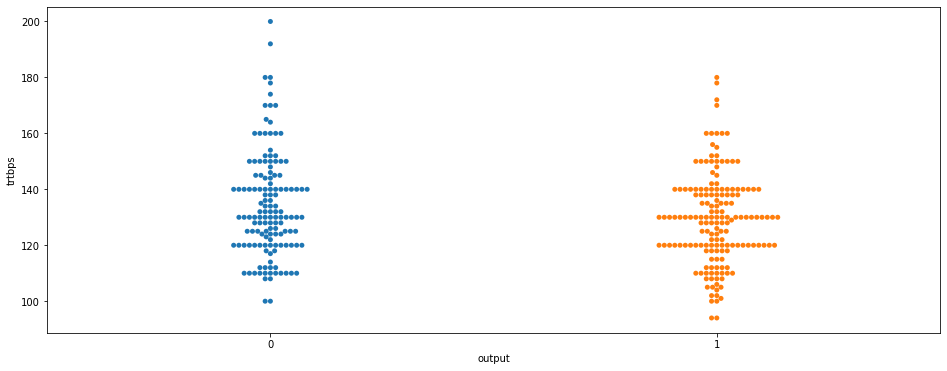

In [54]:
plt.figure(figsize=(16,6))
sns.swarmplot(heart['output'],heart['trtbps'])

So it is now clear that people with output '1' (heart attack is more posssible to them) are more in the (100,150) region.

Lets find out something about cholestrol:

<AxesSubplot:xlabel='chol', ylabel='density'>

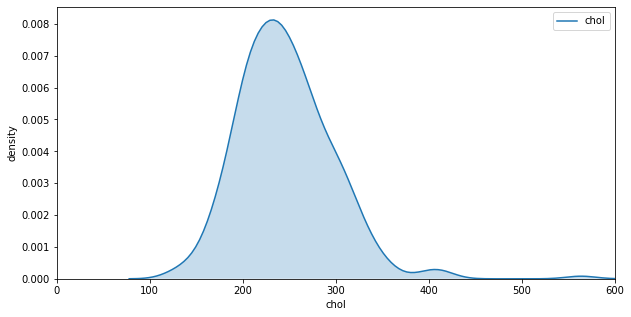

In [56]:
plt.figure(figsize=(10,5))
plt.xlim(0,600)
plt.xlabel('chol')
plt.ylabel('density')
sns.kdeplot(heart['chol'],shade=True)

Data is more dense about 150 to 250 mg/dl which is above the normal value, so we expct the same thing again:

<AxesSubplot:xlabel='output', ylabel='chol'>

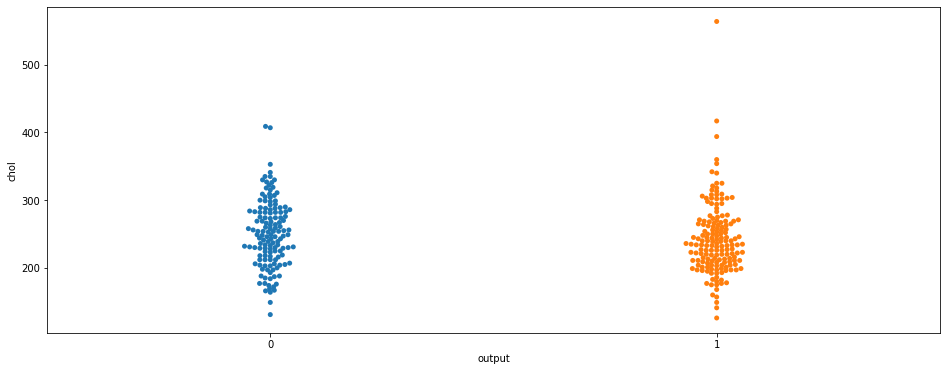

In [66]:
plt.figure(figsize=(16,6))
sns.swarmplot(heart['output'], heart['chol'])

Again from this plot we can get that in the region 150 to 250 mg/dl value for chol the chance of getting a heart attacj is more.


Before doing Classification and prediction using scikit-learn, it will be helpful to plot a pairplot to see the total effect off each feature on output:

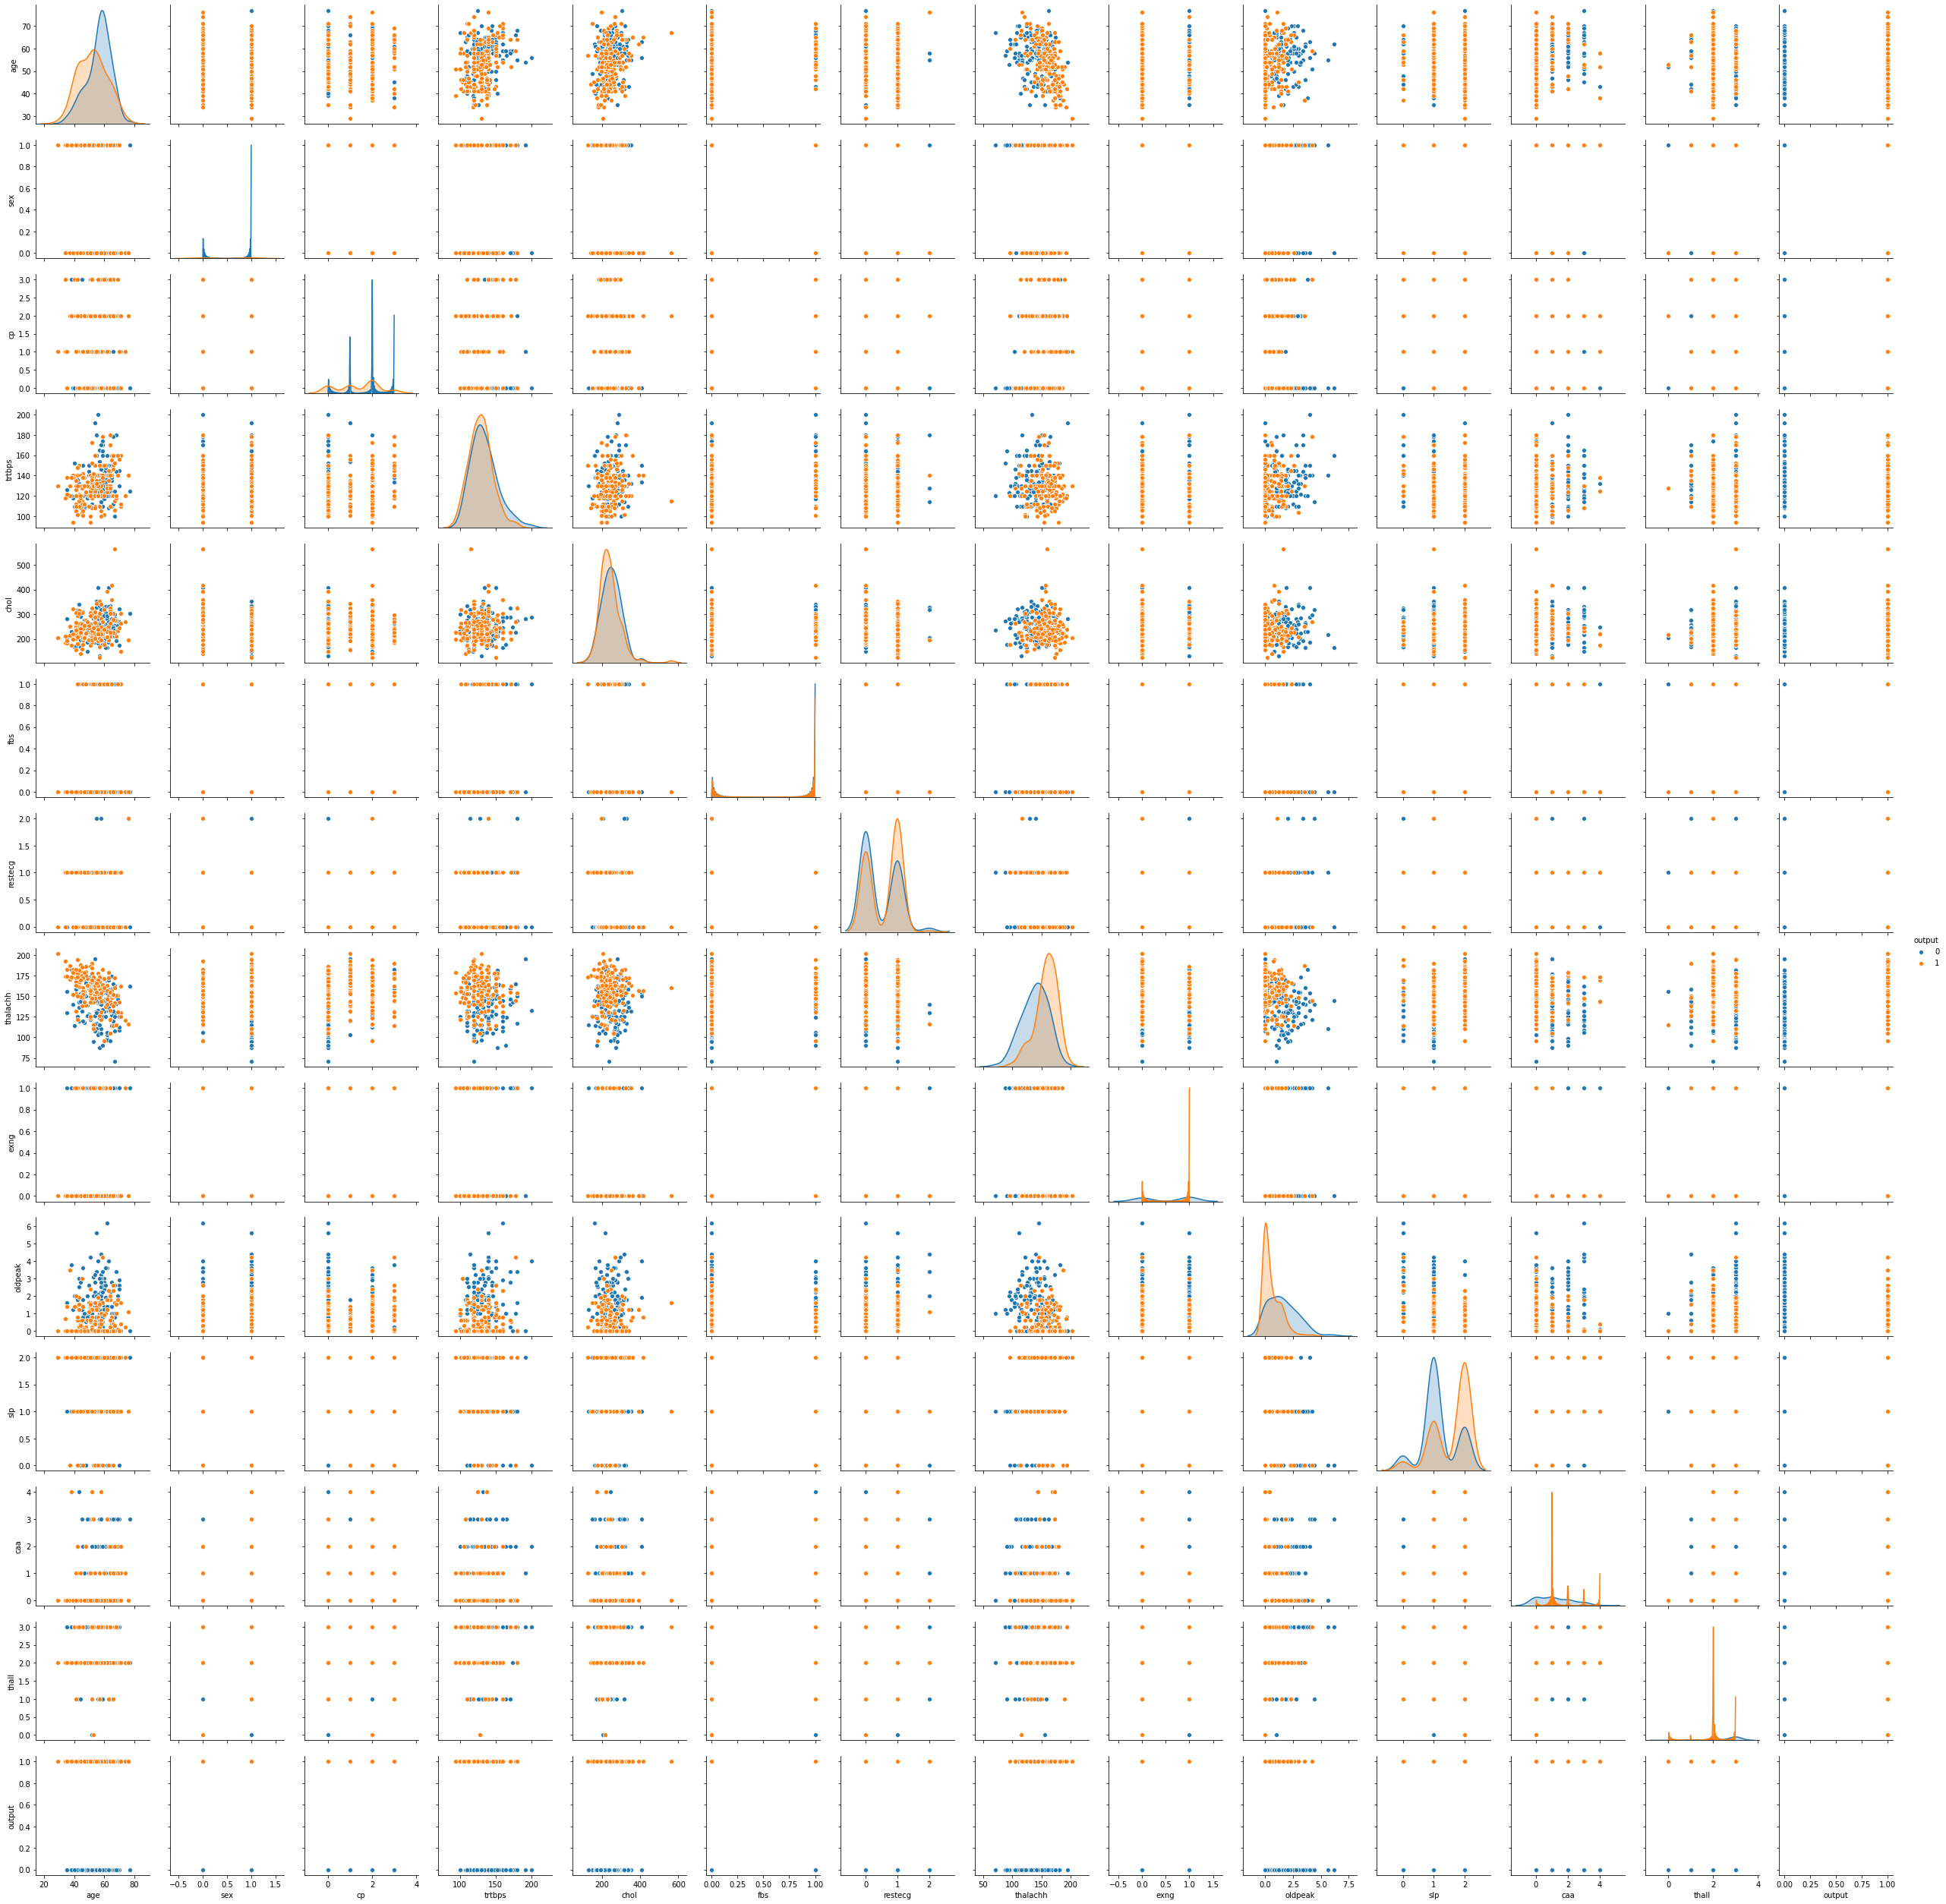

In [6]:
sns.pairplot(data=heart, hue='output')

# Now it is time to do Classification task on this data using Logistic Regression model:

First, split the data into training set and testing set using train_test_split:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = heart.drop(['output'], axis=1) # To choose every columns as X except the target column.
y = heart['output'] # Choosing target column as y.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Train and fit a logistic regression model on the training set:

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

Now predict values for the testing data:

In [19]:
predictions = logistic_model.predict(X_test)

Create a confusion matrix and classification report for the model:

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print('confusion matrix:')
print(confusion_matrix(y_test,predictions))

confusion matrix:
[[33 13]
 [ 2 52]]


In [25]:
print('classification report:')
print(classification_report(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81        46
           1       0.80      0.96      0.87        54

    accuracy                           0.85       100
   macro avg       0.87      0.84      0.84       100
weighted avg       0.87      0.85      0.85       100



at the end I should remind that this is an small dataset, so we won't expect big results of it; by the way, it is helpful to check our knowledge from wikipedia about common ages, BP and Cholesterol conditions of heart attacking! and also make a logistic regression model with a good Classification report.